In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('freshly brewed pt.2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
 2   AMOUNT  100 non-null    int64  
 3   RATE    100 non-null    int64  
 4   WEIGHT  100 non-null    int64  
 5   AGE     100 non-null    int64  
 6   SEX     100 non-null    int64  
 7   CRCL    100 non-null    int64  
 8   Group   100 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 KB


In [4]:
from sklearn.model_selection import train_test_split

output_features = ['1', '2',]
input_features = ['AMOUNT', 'RATE', 'WEIGHT', 'AGE', 'SEX', 'CRCL','Group' ]

x = df[input_features]
y = df[output_features]

In [5]:
print("Input shape:", x.shape)
print("Output shape:", y.shape)


Input shape: (100, 7)
Output shape: (100, 2)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
print("Training Input shape:", x_train.shape)
print("Testing Input shape:", x_test.shape)
print("Training Output shape:", y_train.shape)
print("Testing Output shape:", y_test.shape)


Training Input shape: (80, 7)
Testing Input shape: (20, 7)
Training Output shape: (80, 2)
Testing Output shape: (20, 2)


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [9]:
x.head()

AMOUNT  RATE  WEIGHT  AGE  SEX  CRCL  Group
0    1000   500      60   21    1    74   1000
1    1000   500     100   51    1    67   1000
2    1000   500      55   54    1    38   1000
3    1000   500      57   38    0   112   1000
4    1000   500      99   33    1    57   1000

In [10]:
y.head()

1           2
0  102.618989  456.033606
1  100.580806  190.607262
2  124.668629  234.962114
3  100.760795  203.645848
4   63.280291  119.978449

In [11]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.24, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
Ypred = regressor.predict(x_test)

In [15]:
Ypred[0]

array([ 69.83277164, 163.0634148 ])

In [16]:
y_pred = model.predict(x_test)


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 45.62177878514462
Mean Squared Error: 4059.0690281027023
R-squared: 0.2890779320709096


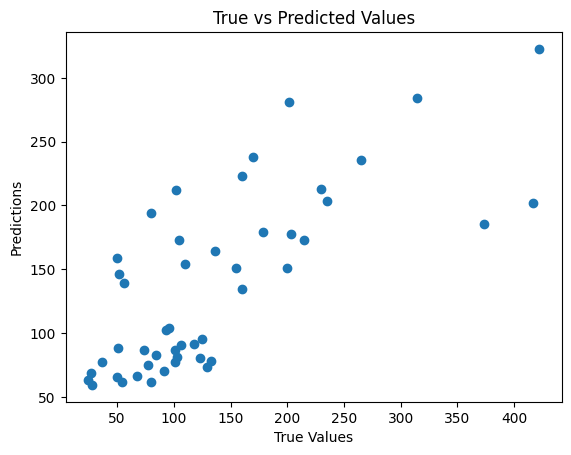

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('freshly brewed pt.2.csv')

# Define input and output features
output_features = ['1', '2']
input_features = ['AMOUNT', 'RATE', 'WEIGHT', 'AGE', 'SEX', 'CRCL', 'Group']

# Prepare input (X) and output (y) data
x = df[input_features]
y = df[output_features]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()


Mean Absolute Error: 60.649630004997164
Mean Squared Error: 7282.113678986073
R-squared: -0.17083098314910783


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

# Load your dataset
df = pd.read_csv('freshly brewed pt.2.csv')

# Split data into features and target
X = df.drop(['AMOUNT', 'RATE', 'WEIGHT', 'AGE', 'SEX', 'CRCL', 'Group'], axis=1)
y = df['1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate your model (optional)
# For example, you can calculate metrics like R-squared, RMSE, etc.

# Save the trained model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)
